# In-Class 4: Light

In this week's lab, we learned about light propagation and polarizers, demonstrating the inverse square law and Malus's law. Today, we'll learn a bit about fitting, and try to extract more information from the data you took in lab. 

## Inverse Square Law

This week, the data we took isn't so easy to import, because it wasn't a simple CSV with column headers and values for a bunch of different measurements. When we've imported data in the past, we've made sure to put it in that form first. So what do we do to use our data? 

In general, we have two options: clean it up and import it, or enter it manually. **I'll explain how to clean the data, but today we're going to enter it manually (so you can learn a bit about lists and dictionaries).**

### Cleaning data

If you want to import data, we need a simple structure. Row 0 should contain labels for the types of data you gathered, and all other rows should be the values of that data for each measurement you took. That means that you essentially need to drop the sections you created about background intensity and sensor offset to get it into that format. 

If you want to keep that data, you have two choices. You can add a new column for those parameters, and enter the same value for each measurement, or you can just manually define those variables in your code. 

If you do all of that, you should be able to export your spreadsheet as a CSV and import it the same way we usually do. But that's not what we're doing today!

### Entering data manually

Sometimes the effort to clean data is more than just entering it manually, especially when you have a pretty small dataset like we do. If that's the case, you can just manually create your own data structure. 

We'll store the data in an object called a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries). Before we learn about dictionaries, it's helpful to first learn about a more simple object, a [list](https://docs.python.org/3/tutorial/introduction.html#lists). 

A list is a collection of objects that have a fixed order. We define them like this:

`myList = ["a", "b", "c", "d"]`

That creates a list of strings, and I can access the values I stored in the list by their indices. I could type for example, `print(myList[1])`, and it would print `b` (in computer science we start counting at 0!) We can store anything we want in a list, including other lists.

```
myList = [ ["a", "b", "c"],
           ["i", "j", "k"],
           ["x", "y", "z"] ]
```

This is called a nested list. If we executed `print(myList[1])` now, we'd get a list, `['i', 'j', 'k']`. If we want an individual element, we can just index the list again -- `myList[1]` returns a list object, so to get e.g. the `k` out of that list we can say `myList[1][2]`. You can test all of this out if you'd like to get more familiar with it.

Not everything in the list has to be the same object type: Python is extremely flexible and lets you store any mix you like. But be careful -- this can be confusing to parse! 

A dictionary is like a list, but it lets us do something very useful: label our data. Instead of relying on the numeric indices to access data, we can give it a unique value to use to access it. This value can be anything (a string, an int, a float...) but each one has to be unique. Most often use strings. 

Let's say I wanted to store all the grades for my course. I could make a list of grades for each student, and label the lists with their names. The syntax looks like this:

```
classGrades = { "Amy": [100, 90, 98],
                "Ben": [87, 95, 92],
                "Sam": [94, 98, 94]  }
```

Now instead of asking for indices, I can use names to grab this data. I could get Sam's grades by typing `classGrades["Sam"]`, which would return the full list. If I wanted to average Sam's grades, I could use this: `avg = sum(classGrades["Sam"]) / len(classGrades["Sam"])`. We can perform simple operations like these on lists. 

We can add more entries to the dictionary after the fact. If I wanted to add in another student, I can just do this:

`classGrades["Dan"] = [78, 88, 95]`

This dictionary didn't have to have lists in it -- it could be any object, including another dictionary (nested dictionaries!). It could also just be a a simple int. These data structures are extremely flexible, and really let us store whatever we want. We just need to think carefully about how to store data so we can easily get it out again.

Play around with the example below to get a feel for this if you like. (Don't mess with the class grade values though, I'm about to ask you to do something with them!)

In [1]:
myList = ["a", "b", "c", "d"]
print(myList[1])

myList = [ ["a", "b", "c"],
           ["i", "j", "k"],
           ["x", "y", "z"] ]
print(myList[1])
print(myList[1][2])

classGrades = { "Amy": [100, 90, 98],
                "Ben": [87, 95, 92],
                "Sam": [94, 98, 94]  }
print(classGrades["Sam"])
avg = sum(classGrades["Sam"]) / len(classGrades["Sam"])
print(avg)

classGrades["Dan"] = [78, 88, 95]
print(classGrades)

b
['i', 'j', 'k']
k
[94, 98, 94]
95.33333333333333
{'Amy': [100, 90, 98], 'Ben': [87, 95, 92], 'Sam': [94, 98, 94], 'Dan': [78, 88, 95]}


### Add your conclusions here:

#### What is the difference between a dictionary and a list? What's a circumstance where you might want to use each?

A dictionary allows you to associate values with one another in more ways than a list does. A list is useful for storing massive amounts of data that only needs to maintain its order. A dictionary adds complexity to maintain additional information about each value, such as, for instance, context. Lists are great for storing data from a single column in a CSV file. A dictionary would be more appropriate for holding the entire contents of a small table in a spreadsheet.

In [2]:
# TODO: Calculate and print out the class average for the first test (including all 4 students)
import numpy as np
import statistics as stat

firstTestScores = []

for name, val in classGrades.items():
    firstTestScores.append(val[0])

print(stat.mean(firstTestScores))

89.75


OK, hopefully now you have a basic idea of what lists and dictionaries can do for you, and the difference between them. If you want to use a dictionary to enter your data, what should it look like? What structure makes sense for the data you have, and will let you access the data to plot it? Remember that when you ultimately make a plot, you'll be handing the plotter a list of x values and a list of y values. 

In [3]:
# TODO: Enter your data here.
# Store your data in a variable called myData
# My code snippets assume you'll use the labels 
# "base", "base_frac_unc", "intensity", "intensity_frac_unc"

myData = {
        "base": [55, 52, 49, 46, 43, 40, 37, 30, 27, 17],
        "base_frac_unc": [(0.1/55), (0.1/52), (0.1/49), (0.1/46), (0.1/43), (0.1/40), (0.1/37), (0.1/30), (0.1/27), (0.1/17)],
        "intensity": [0.88, 0.94, 1.05, 1.21, 1.42, 1.72, 2.12, 4.12, 6.18, 95.34],
        "intensity_frac_unc": [(0.02/0.88), (0.01/0.94), (0.02/1.05), (0.01/1.21), (0.02/1.42), (0.01/1.72), (0.01/2.12), (0.01/4.12), (0.01/6.18), (0.01/95.34)]
         }


We don't quite have everything we need yet -- when we plot, we need to have our uncertainty in the same units as our central values, while we currently have a fractional uncertainty (unitless). We can fix this by calculating those values with the lists we already have and adding them to our dictionary.

In [4]:
# Write a function that can turn a list with fractional uncertainty 
# into a list with uncertainty in the same units as the parameter

# The function takes the list of values and list of fractional uncertainties as arguments
# It needs to return a list of uncertainties in whatever units the base list is in
def getUncertainty(values_list, frac_unc_list):
    unc_list = []
    
    i = 0
    
    while i < len(values_list):
        unc_list.append(frac_unc_list[i]*values_list[i])
        i += 1

    return unc_list

# We'll call this function twice, once for intensity and once for base location
# Each time we'll pass the function the value list and the fractional uncertainty list for the variable
# Each time it will return a list, meaning once we evaluate getUncertainty(x,y), we'll get a list object back
# We can store that list in a variable, or we can put it directly into our dictionary
# Below is the syntax to put it into the dictionary with new labels so we can grab it later:
myData["intensity_unc"] = getUncertainty(myData["intensity"], myData["intensity_frac_unc"])
myData["base_unc"] = getUncertainty(myData["base"], myData["base_frac_unc"])

print(myData["intensity_unc"])
print(myData["base_unc"])

[0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


Doing that in loop form is a lot of work. This is one of the reasons we use Pandas and Numpy so much. These both let us perform "columnar operations", i.e. they let us do things like multiply one column of data by another without explicitly writing out a loop. They can also do it faster, which is a big deal if you have a really large dataset.

Below is an example of how you can convert a dictionary to a Pandas dataframe, and how you can use the dataframe to quickly calculate the same values you calculated with much more effort above. You don't need to understand all the details of Pandas for this class, but we're going to be using it from time to time. 

In [5]:
# First we have to import pandas, then convert our dictionary into a dataframe
import pandas as pd
myPdData = pd.DataFrame.from_dict(myData)
print(myPdData)
# Notice that even the print out of the dataframe is a little better suited 
# to this kind of data compared to the simple dictionary.

# Once that's done, we can just simpily multiply columns. If we wanted to keep using this, 
# we would store these values back into the dataframe, the same way we did for myData.
print("\nHere are some examples of calculations:")
print(myPdData["base"]*myPdData["base_frac_unc"])
print(myPdData["intensity"]*myPdData["intensity_frac_unc"])

# We could also use pandas for the classGrades example above
# The fuction iloc lets us grab a row of our choice 
# (Look at the print-out to see what I mean by 'row' vs 'column')
# and the built in averaging function makes our life very easy
pdClassGrades = pd.DataFrame.from_dict(classGrades)
print("\nHere's the average we calculated earlier:")
print(pdClassGrades)
print("Average of the first test:", pdClassGrades.iloc[0].mean())

# Pandas is a bit more complicated to understand, and the syntax has a lot more going on,
# but it can really simplify problems when you're dealing with data.

   base  base_frac_unc  intensity  intensity_frac_unc  intensity_unc  base_unc
0    55       0.001818       0.88            0.022727           0.02       0.1
1    52       0.001923       0.94            0.010638           0.01       0.1
2    49       0.002041       1.05            0.019048           0.02       0.1
3    46       0.002174       1.21            0.008264           0.01       0.1
4    43       0.002326       1.42            0.014085           0.02       0.1
5    40       0.002500       1.72            0.005814           0.01       0.1
6    37       0.002703       2.12            0.004717           0.01       0.1
7    30       0.003333       4.12            0.002427           0.01       0.1
8    27       0.003704       6.18            0.001618           0.01       0.1
9    17       0.005882      95.34            0.000105           0.01       0.1

Here are some examples of calculations:
0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1


OK, that was just an aside about Pandas which hopefully helped clarify what it is and why we're using it. Essentially, it's a toolkit that makes data analysis easier. But for now we can stick with our simpler dictionary, because we've already calculated everything we need to plot in it.

Let's plot the data now! Don't forget to label your axes.

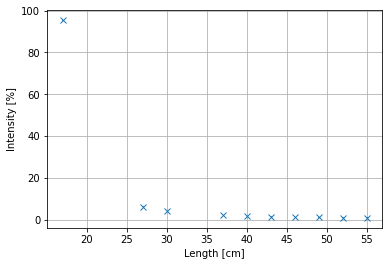

In [6]:
# TODO: make a plot of your intensity as a funciton of your sensor base position.
# Include your uncertainties (look back at Comp2 for an example!)
# Don't forget to import any modules you might need, and always label your axes including units.
# Make sure to use the uncertainties that make sense on the axis you're plotting them on!

from matplotlib import pyplot as plt

plt.errorbar(myPdData['base'],myPdData['intensity'], 
             yerr=myPdData['base_unc'], xerr=myPdData['intensity_unc'],
             marker='x', linestyle='none')

plt.xlabel('Length [cm]')
plt.ylabel('Intensity [%]')
plt.grid()
plt.show()

As you saw in your lab, the relationship between your measured values isn't simple -- measured intensity doesn't just scale as $1/r$ because there are some offsets that need to be corrected for. In your lab, perhaps you corrected for these offsets manually, then plotted a simple linear relationship (or maybe not!) Either way, here we're going to just try to fit the full functional form of the curve, and see if we can extract the offsets we measured. 

As a reminder, this is the equation for intensity as a function of distance: 

$$ I(r) = \frac{S}{4\pi r^2} $$

Where $S$ is the power emitted by the source, $r$ is the distance from the source, and $I(r)$ gives the power delivered per square meter at that distance. None of these are variables you measured, so we'll need to re-write this equation in terms of the things you _did_ measure.

Instead of the above equation, we can write something like this:

$$ I_\mathrm{meas}(r) = \frac{I_\mathrm{ref}}{(r_\mathrm{base} - r_\mathrm{off})^2} + I_\mathrm{background} $$ 

Where $I_\mathrm{ref}$ is a value we'll fit for, which incorporates all the constants, including a correction for the size of the sensor (our initial intensity was in power per square meter, which isn't representative of what our sensor receives). We'll also correct our base measurement with an offset factor, which we'll allow the fit to pick a value for as well. The value of this parameter should give you the distance between your base marker and the sensor itself.

**There will be some things below for you to fill in -- they're marked with a #TODO as usual.**

Fit parameters -- r_off: 13.67240833225208, I_ref: 1053.3605211869346, I_bkg: 0.21028167925690697
Uncertainties  -- r_off: 0.00019843506454068202, I_ref: 82.07010513672068, I_bkg: 0.00031079958847028086


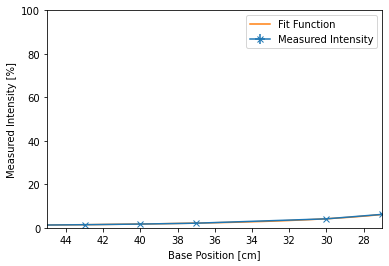

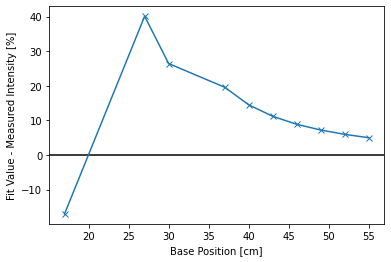

In [7]:
# The goal of this cell is to fit the data to a function that looks like the one above
# You may need to enter some guessed values for your parameters. Fitting a function with no constraints is hard.
# IF YOU GET AN ERROR LIKE THIS:
# RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
# this is a sign that your fitter is struggling to converge. Likely, you haven't set up your equation right
# or your initial guesses for your parameters are too far off. Check your function, try fiddling with guesses, 
# and call me over if you've been fiddling for a while without success.

# Once you have a fit, you'll plot the data as well as the fit function and see how they line up

# curve_fit is the function we'll use for fitting
from scipy.optimize import curve_fit
import numpy as np

# This defines the shape of the function we'll use. The first variable is the x axis.
# All the other variables are free parameters that the function will optimize.
def fit_func(r_base, r_off, I_ref, I_bkg):
    frac_d = (r_base-r_off)*(r_base-r_off)
    return (I_ref/frac_d)+I_bkg


# These are initial guesses for the parameters
# If your function isn't converging, change them to your best guesses from the lab
guess_r_off = 7
guess_I_ref = 1000
guess_I_bkg = 10

# Here we're calling the fitter, handing it the function it should fit, the data, and our guesses
# It returns the fit parameters, which we're assigning to individual variables
# It also returns the fit covariance, which tells us the uncertainty on each parameter
# as well as how the parameter values depend on one another. It's a 2D array, and the 
# variances of each parameter can be found in order along the diagonal.
fit_params, fit_cov = curve_fit(fit_func, myData['base'], myData['intensity'], p0=(guess_r_off, guess_I_ref, guess_I_bkg))
r_off, I_ref, I_bkg = fit_params
print("Fit parameters -- r_off: {}, I_ref: {}, I_bkg: {}".format(r_off, I_ref, I_bkg))
print("Uncertainties  -- r_off: {}, I_ref: {}, I_bkg: {}".format(fit_cov[0][0],fit_cov[1][1],fit_cov[2][2]))

# To plot the fit function, we just need to generate some x values
# then calculate our corresponding y values using the function we defined
# and the parameters we got out of the fit.
x_fit = np.linspace(0, 100, 300)
y_fit = fit_func(x_fit, r_off, I_ref, I_bkg)

plt.errorbar(myData['base'], myData['intensity'], xerr=myData['base_unc'], yerr=myData['intensity_unc'], marker='x', label="Measured Intensity")
plt.plot(x_fit, y_fit, label="Fit Function")
plt.xlim([myData['base'][0]-10, myData['base'][-1]+10])
plt.ylim([0,100])
plt.xlabel("Base Position [cm]")
plt.ylabel("Measured Intensity [%]")
plt.legend()
plt.show()

# It's hard to tell just how far off you were by looking at the main plot. 
# We'll also make a plot of the difference between our fit and our measurement
# TODO: define y_diff as the difference between the fit function and the data
x_for_y_diff = np.linspace(0, len(myData['intensity']), len(myData['intensity']))
y_diff = fit_func(x_for_y_diff, r_off, I_ref, I_bkg)-myData['intensity']
y_diff_unc = myData["intensity_unc"]
plt.errorbar(myData['base'], y_diff, yerr=y_diff_unc, marker='x')
plt.axhline(0, color='black')
plt.xlabel("Base Position [cm]")
plt.ylabel("Fit Value - Measured Intensity [%]")
plt.show()



### Add your conclusions here:

#### Was it easy to see the inverse square proportionality in your datapoints? Would you change the way you collected data if you had to do this again?

The slope of our data aligned to inverse-square proportionality, but our data seemed consistently off from where it should have been. This may have been due to our position right next to an emergency light in the lab, which made our area considerably brighter than other stations and may not have been entirely accounted for in adjustments for background intensity. Whatever its source, the rather consistent +10% difference in intensities is almost certainly systemic. 

To get a better idea of how closely we could get to inverse square proportionality, if we had the chance to do this lab over again, I would want to do at least a third of our measurements within the 25 cm radius range to get a better idea of the slope of the steep increase we saw going from 25 to <20 cm.

#### How does your fit - measured value plot compare to the uncertainty you estimated in lab? Do you think you did you do a good job estimating uncertainty? If not, how would you change it, and why?

The fit-measured plot shows so little difference that I thought I had done it wrong. I think our approach to estimating uncertainty was sound, as we waited at least 20 seconds for each measurement and observed the fluctuations in intensity to get an idea of a potential minimum/maximum for the experimental arrangement.

#### How do the fit uncertainties for the different parameters compare? Are some much larger than others? Why do you think this is?

We had a pretty big "outlier" for our final measurement, in which we placed the sensor relatively near the light. Since there weren't many other data points in a similar path, the curve_fit function seems to have taken that particular point with a large grain of salt while eyeing a bottle of tequila. This explains the large difference between the intensity uncertainty and the other two, which are at least within the same magnitude of each other.


### _For a challenge..._

Here is an extension to today's exercises that are beyond the scope of what's expected of you in this class. Give it a try if you'd like, or ignore this completely! There's only one challenge today, but it has a lot of parts.

1. Repeat this process for your Law of Malus data, and see if you can get a reasonable fit.

Fit parameters -- a_off: -562.7670374516886, I_ref: 125803604.59977299, I_bkg: -302.2192753929355
Uncertainties  -- a_off: 202968.77604563782, I_ref: 7.806371779390533e+16, I_bkg: 62637.492422810865


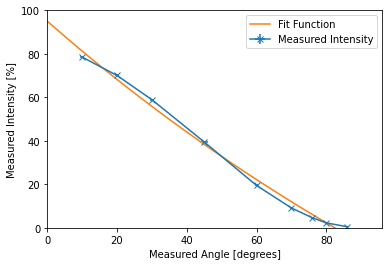

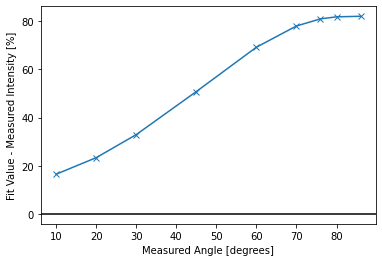

In [9]:
# I recorded direct uncertainties, so just gonna make things a little easier on myself with this
# fractional-uncertainty-to-regular-uncertainty function.

def sig_to_eps(sig, val):
        return sig/val    

# Data entry starting salary is around $20k.

malusData = {
        "angle": [10, 20, 30, 45, 60, 70, 76, 80, 86],
        "angle_unc": [0.5, 0.5, 0.5, 1, 0.5, 0.5, 0.3, 0.5, 0.3],
        "angle_frac_unc": [],
        "intensity": [78.5, 70.05, 58.9, 39.45, 19.47, 9.11, 4.61, 2.25, 0.49],
        "intensity_unc": [0.10, 0.05, 0.05, 0.05, 0.01, 0.01, 0.02, 0.01, 0.01],
        "intensity_frac_unc": []
         }

# 
i = 0 

while i < len(malusData["angle_unc"]):
    malusData["angle_frac_unc"].append(sig_to_eps(malusData["angle_unc"][i],malusData["angle"][i]))
    malusData["intensity_frac_unc"].append(100*sig_to_eps(malusData["intensity_unc"][i],malusData["intensity"][i]))
    i += 1

guess_a_off = 0

# Here we're calling the fitter, handing it the function it should fit, the data, and our guesses
# It returns the fit parameters, which we're assigning to individual variables
# It also returns the fit covariance, which tells us the uncertainty on each parameter
# as well as how the parameter values depend on one another. It's a 2D array, and the 
# variances of each parameter can be found in order along the diagonal.
malus_fit_params, malus_fit_cov = curve_fit(fit_func, malusData['angle'], malusData['intensity'], p0=(guess_a_off, guess_I_ref, guess_I_bkg))
a_off, I_ref, I_bkg = malus_fit_params
print("Fit parameters -- a_off: {}, I_ref: {}, I_bkg: {}".format(a_off, I_ref, I_bkg))
print("Uncertainties  -- a_off: {}, I_ref: {}, I_bkg: {}".format(malus_fit_cov[0][0],malus_fit_cov[1][1],malus_fit_cov[2][2]))

# To plot the fit function, we just need to generate some x values
# then calculate our corresponding y values using the function we defined
# and the parameters we got out of the fit.
malus_x_fit = np.linspace(0, 100, 300)
malus_y_fit = fit_func(malus_x_fit, a_off, I_ref, I_bkg)

plt.errorbar(malusData['angle'], malusData['intensity'], xerr=malusData['angle_unc'], yerr=malusData['intensity_unc'], marker='x', label="Measured Intensity")
plt.plot(malus_x_fit, malus_y_fit, label="Fit Function")
plt.xlim([malusData['angle'][0]-10, malusData['angle'][-1]+10])
plt.ylim([0,100])
plt.xlabel("Measured Angle [degrees]")
plt.ylabel("Measured Intensity [%]")
plt.legend()
plt.show()

# It's hard to tell just how far off you were by looking at the main plot. 
# We'll also make a plot of the difference between our fit and our measurement
# TODO: define y_diff as the difference between the fit function and the data
malus_x_for_y_diff = np.linspace(0, len(malusData['intensity']), len(malusData['intensity']))
malus_y_diff = fit_func(malus_x_for_y_diff, a_off, I_ref, I_bkg)-malusData['intensity']
malus_y_diff_unc = malusData["intensity_unc"]
plt.errorbar(malusData['angle'], malus_y_diff, yerr=malus_y_diff_unc, marker='x')
plt.axhline(0, color='black')
plt.xlabel("Measured Angle [degrees]")
plt.ylabel("Fit Value - Measured Intensity [%]")
plt.show()

